# Data Analysis and Visualization of Student Scores

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load and Explore Data

In [2]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [3]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## Drop Unnecessary Columns

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Check for Duplicate Rows

In [7]:
duplicate_rows_data = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (0, 14)


## Count Unique Values in Each Column

In [8]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Gender: 2 distinct values
EthnicGroup: 6 distinct values
ParentEduc: 7 distinct values
LunchType: 2 distinct values
TestPrep: 3 distinct values
ParentMaritalStatus: 5 distinct values
PracticeSport: 4 distinct values
IsFirstChild: 3 distinct values
NrSiblings: 9 distinct values
TransportMeans: 3 distinct values
WklyStudyHours: 4 distinct values
MathScore: 95 distinct values
ReadingScore: 90 distinct values
WritingScore: 93 distinct values


## Display Data Head

In [9]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## Plot Distribution of Scores

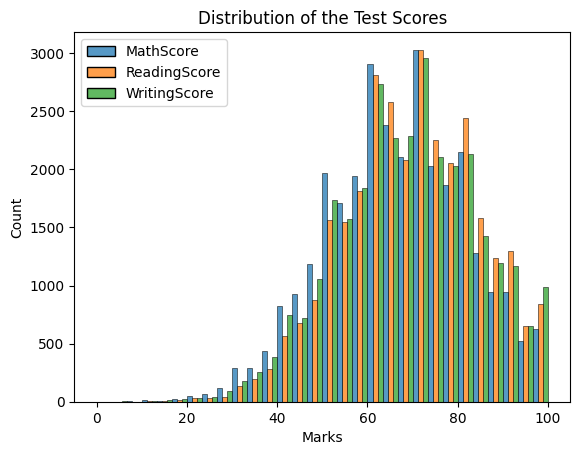

In [10]:
sns.histplot(df[['MathScore', 'ReadingScore', 'WritingScore']], multiple='dodge', bins=30)
plt.title('Distribution of the Test Scores')
plt.xlabel('Marks')
plt.show()

## Gender Distribution

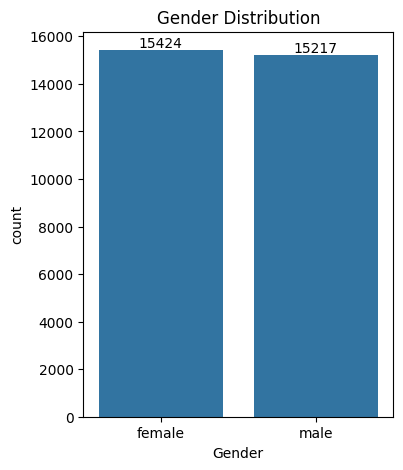

In [11]:
plt.figure(figsize=(4,5))
ax = sns.countplot(data=df, x='Gender')
ax.bar_label(ax.containers[0])
plt.title('Gender Distribution')
plt.show()

## Average Scores by Gender

In [16]:
df.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

C:\Users\sdesh\AppData\Local\Temp\ipykernel_7864\150714048.py:1: FutureWarning: The provided callable <function mean at 0x0000028810B92520> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)


,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.080654,72.853216,72.856457
male,69.069856,65.854571,63.920418


## Boxplots of Test Scores

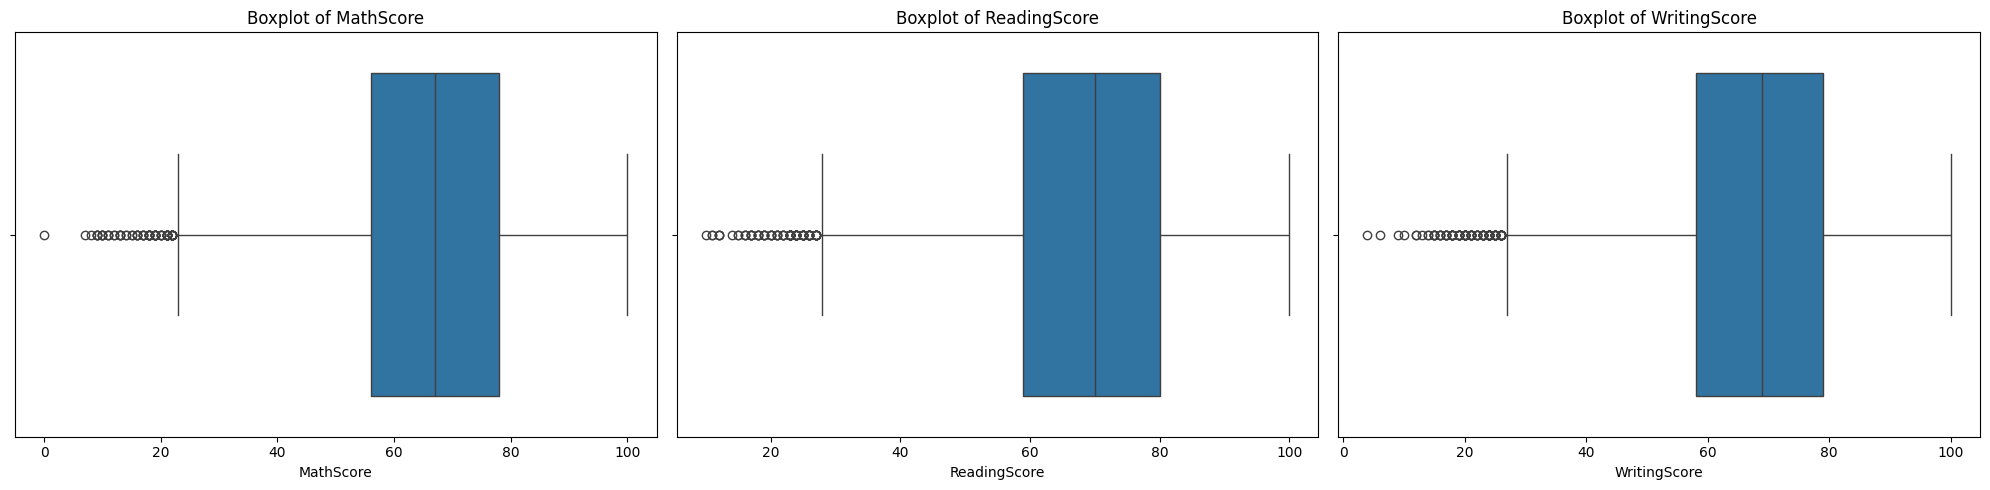

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
columns = ['MathScore', 'ReadingScore','WritingScore']
for i , col in enumerate(columns):
    ax= axs[i]
    sns.boxplot(x=df[col], ax= ax)
    ax.set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

## Distribution of Ethnic Groups

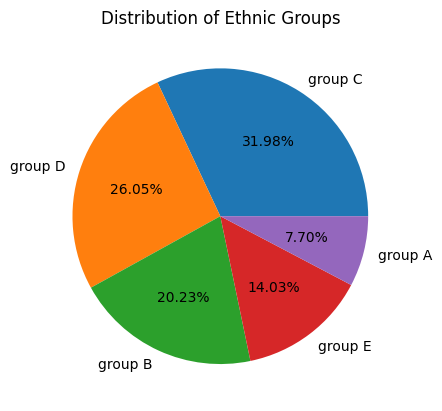

In [18]:
ethnic_counts = df['EthnicGroup'].value_counts()
labels = ethnic_counts.index.tolist()
counts = ethnic_counts.values
plt.pie(counts, labels=labels, autopct='%1.2f%%')
plt.title('Distribution of Ethnic Groups')
plt.show()

## Scores by Ethnic Group

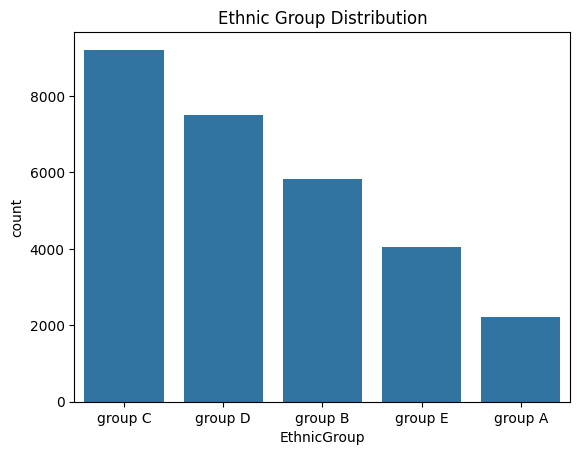

In [ ]:
sns.countplot(x=df['EthnicGroup'], order=['group C', 'group D', 'group B', 'group E', 'group A'])
plt.title('Ethnic Group Distribution')

## Average Scores by Ethnic Group

In [23]:
def display_stats(df, group_column):
    print(df.groupby([group_column])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean))
display_stats(df, 'EthnicGroup')

             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      62.991888     66.787742     65.251915
group B      63.490216     67.320460     65.895125
group C      64.695723     68.438233     66.999240
group D      67.666400     70.382247     70.890844
group E      75.298936     74.251423     72.677060


C:\Users\sdesh\AppData\Local\Temp\ipykernel_7864\2383428871.py:2: FutureWarning: The provided callable <function mean at 0x0000028810B92520> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(df.groupby([group_column])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean))


## Parent Education Level vs Student Scores

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


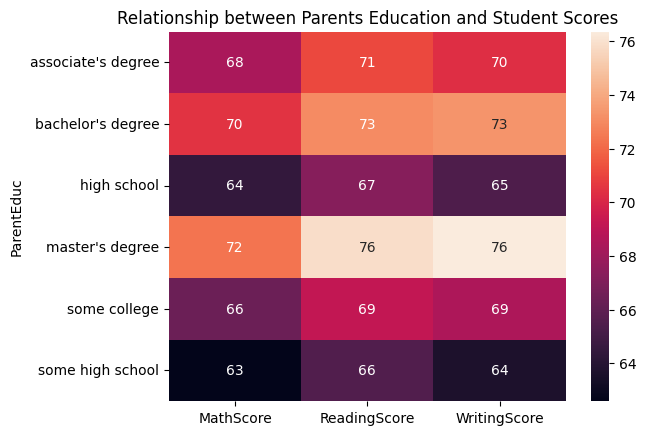

In [21]:
gb = df.groupby('ParentEduc').agg({'MathScore':'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})
print(gb)
sns.heatmap(gb, annot=True)
plt.title('Relationship between Parents Education and Student Scores')
plt.show()

*from the above chart we have concluderd that the education of the parents have good impact on their childrens education.*

## Parent Marital Status vs Student Scores

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


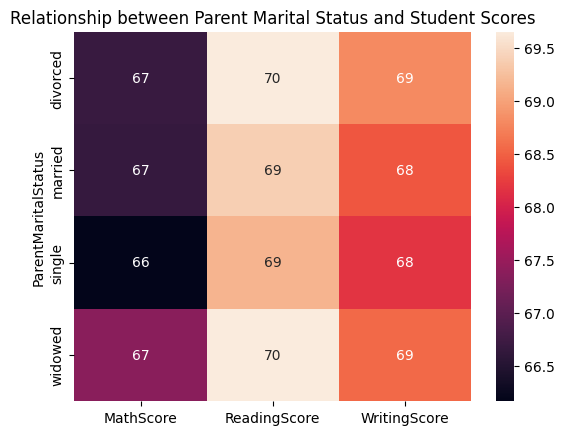

In [22]:
gb1 = df.groupby('ParentMaritalStatus').agg({'MathScore':'mean', 'ReadingScore':'mean', 'WritingScore':'mean'})
print(gb1)
sns.heatmap(gb1, annot=True)
plt.title('Relationship between Parent Marital Status and Student Scores')
plt.show()

*From the above chart we have concluded that there is no/negligible impact on students score due yo their parents  marital status*

## Parent Gender vs Student Scores

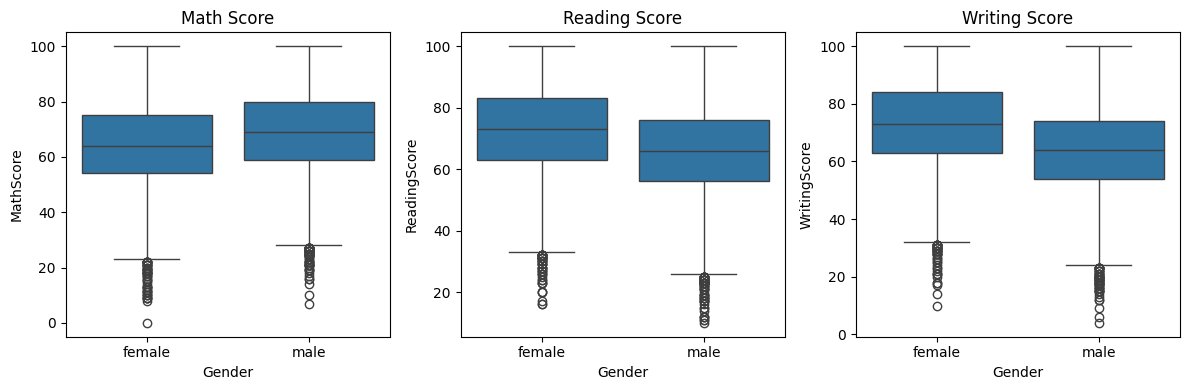

In [24]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by Gender
sns.boxplot(ax=axs[0], x='Gender', y='MathScore', data=df)
axs[0].set_title('Math Score')

# Box plot of ReadingScore by Gender
sns.boxplot(ax=axs[1], x='Gender', y='ReadingScore', data=df)
axs[1].set_title('Reading Score')

# Box plot of WritingScore by Gender
sns.boxplot(ax=axs[2], x='Gender', y='WritingScore', data=df)
axs[2].set_title('Writing Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

*from figure above we can see that males students score slightly better in math where as female students score better in Reading and Writing*

## Distribution Student Scores

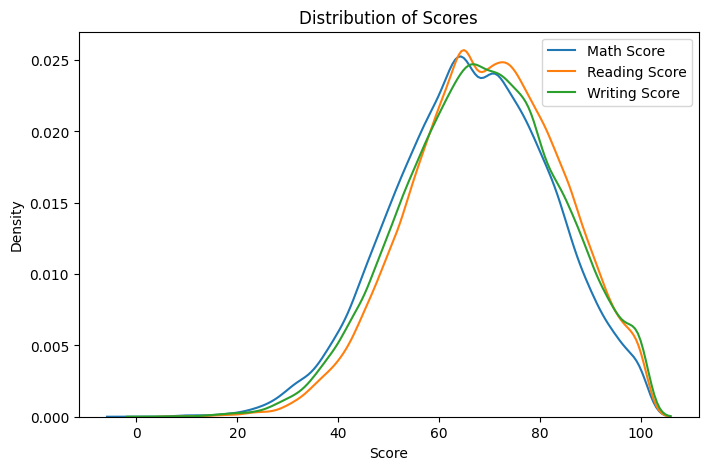

In [31]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Distribution plot of MathScore
sns.kdeplot(df['MathScore'], label='Math Score', ax=ax)

# Distribution plot of ReadingScore
sns.kdeplot(df['ReadingScore'], label='Reading Score', ax=ax)

# Distribution plot of WritingScore
sns.kdeplot(df['WritingScore'], label='Writing Score', ax=ax)

# Set axis labels and title
ax.set_xlabel('Score')
ax.set_ylabel('Density')
ax.set_title('Distribution of Scores')

# Add a legend
ax.legend()

# Display the combined distribution plot
plt.show()


## WklyStudyHours and Gender vs Student Scores

C:\Users\sdesh\AppData\Local\Temp\ipykernel_7864\2260160296.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs2[0].set_xticklabels(axs2[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\sdesh\AppData\Local\Temp\ipykernel_7864\2260160296.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs2[1].set_xticklabels(axs2[1].get_xticklabels(), rotation=45, ha='right')
C:\Users\sdesh\AppData\Local\Temp\ipykernel_7864\2260160296.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs2[2].set_xticklabels(axs2[2].get_xticklabels(), rotation=45, ha='right')


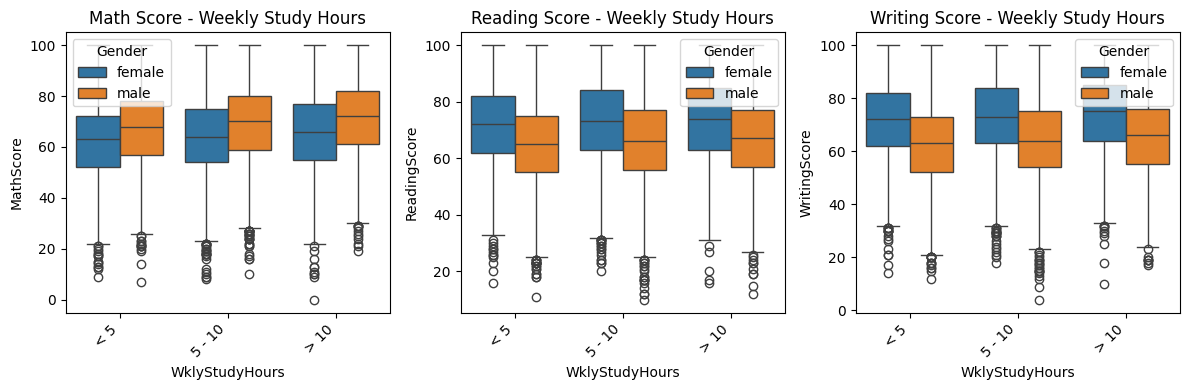

In [25]:
# Create a figure and three subplots for WklyStudyHours
fig2, axs2 = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by WklyStudyHours and Gender
sns.boxplot(ax=axs2[0], x='WklyStudyHours', y='MathScore', hue='Gender', data=df)
axs2[0].set_title('Math Score - Weekly Study Hours')
axs2[0].set_xticklabels(axs2[0].get_xticklabels(), rotation=45, ha='right')

# Box plot of ReadingScore by WklyStudyHours and Gender
sns.boxplot(ax=axs2[1], x='WklyStudyHours', y='ReadingScore', hue='Gender', data=df)
axs2[1].set_title('Reading Score - Weekly Study Hours')
axs2[1].set_xticklabels(axs2[1].get_xticklabels(), rotation=45, ha='right')

# Box plot of WritingScore by WklyStudyHours and Gender
sns.boxplot(ax=axs2[2], x='WklyStudyHours', y='WritingScore', hue='Gender', data=df)
axs2[2].set_title('Writing Score - Weekly Study Hours')
axs2[2].set_xticklabels(axs2[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots for WklyStudyHours
plt.tight_layout()

# Display the merged graph
plt.show()


## Gender and ParentEduc vs student Score

In [26]:
df.groupby(['Gender', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Blues')

C:\Users\sdesh\AppData\Local\Temp\ipykernel_7864\122393680.py:1: FutureWarning: The provided callable <function mean at 0x0000028810B92520> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['Gender', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Blues')


In [29]:
df.groupby(['Gender', 'PracticeSport'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Blues')

C:\Users\sdesh\AppData\Local\Temp\ipykernel_7864\3088998347.py:1: FutureWarning: The provided callable <function mean at 0x0000028810B92520> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['Gender', 'PracticeSport'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Blues')


In [30]:
df.groupby(['PracticeSport', 'WklyStudyHours', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Blues')

C:\Users\sdesh\AppData\Local\Temp\ipykernel_7864\1997599462.py:1: FutureWarning: The provided callable <function mean at 0x0000028810B92520> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['PracticeSport', 'WklyStudyHours', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Blues')
